# Lab 10: Visual Analytics Data application using Streamlit and Machine Learning (Evaluable)

# Lab goals:
In this project, we will build a Visual Analytics app that combines Streamlit and Machine Learning. In particular, our Data web app will explore and predict the salary of the software developers depending on the country, experience and level of education.

As we have done during the course, we will follow the end-to-end **Machine Learning process**:
1. Data understanding and preparation: exploration of the dataset and feature engineering (missing values, outlier identification, categorical variables management)
2. Model Training: training a regression model. Analysis of metrics (i.e. R2_score, mean squared error,...)
3. Creating a Visual Analytics web app based on Streamlit to facilitate the exploration of data and prediction of the salary.

# Practice Information:
**Due date:** By end of November, 15th (23:55h)

**Submission procedure:** via Moodle.

**Name:** Iván Hernández Gómez

**NIA:** 253616


# 0. Context:  

We work in a Human Resources Consultant company supporting to the business consultant team. A common request from our customers from the IT sector is a salary recommendation to be applied to their software development employees.
Therefore, we have been requested to build a Web app with two minimum goals:
- 1 Exploration of salaries per country and experience
- 2 Prediction of a salary based on country, experience and education

We have access to an annual survey by Stack Overflow where we can find more than 67K software developers' answers. Part of the survey includes salary, experience, country, full/partial time employee, language, demographic information and so on.

Taking into consideration the request and this amazing survey you should develop your **own Visual Analytics Data Web** with two main parts:
- a) This Jupyter Notebook to explore the data (i.e. EDA), prepare the data and build a Machine Learning model that predicts the salary of a software employee at least based on **Country**, **Education** and **Experience** variables  
- b) A Streamlit app to explore the data and execute the salary prediction

# 1. Data Gathering
In the survey_results_schema.csv and the survey_results_public.csv you will obtain the schema of the survey and the responses.

Let's import some basic libraries and upload the **survey_results_public.csv** file.

In [143]:
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [144]:
df = pd.read_csv("../data/survey_results_public.csv")

Let's explore the data:

In [145]:

df.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


In [146]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ResponseId                      73268 non-null  int64  
 1   MainBranch                      73268 non-null  object 
 2   Employment                      71709 non-null  object 
 3   RemoteWork                      58958 non-null  object 
 4   CodingActivities                58899 non-null  object 
 5   EdLevel                         71571 non-null  object 
 6   LearnCode                       71580 non-null  object 
 7   LearnCodeOnline                 50685 non-null  object 
 8   LearnCodeCoursesCert            29389 non-null  object 
 9   YearsCode                       71331 non-null  object 
 10  YearsCodePro                    51833 non-null  object 
 11  DevType                         61302 non-null  object 
 12  OrgSize                         

# 2. Data Exploration and Data Wrangling

**EX1** Let's select the variables we are interested in: `Country`, `Education`, `YearsCodePro`, `Employment` and `ConvertedCompYearly`. Rename `ConvertedCompYearly` to `Salary`.

Let's see the data again

In [147]:
selected_columns = ["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]
rename = {"ConvertedCompYearly": "Salary"}

df = df[selected_columns]
df = df.rename(columns=rename)

In [148]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73268 entries, 0 to 73267
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       71771 non-null  object 
 1   EdLevel       71571 non-null  object 
 2   YearsCodePro  51833 non-null  object 
 3   Employment    71709 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.8+ MB


**EX2** Remove the registers with any null in the features and verify all registers are not null

In [149]:
df = df.dropna()
df.isnull().any()

Country         False
EdLevel         False
YearsCodePro    False
Employment      False
Salary          False
dtype: bool

In [150]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [151]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37919 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       37919 non-null  object 
 1   EdLevel       37919 non-null  object 
 2   YearsCodePro  37919 non-null  object 
 3   Employment    37919 non-null  object 
 4   Salary        37919 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


**EX3** Select the registers in the dataset that are full-employed and remove "employment" column

In [152]:
df["Employment"].unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time', 'I prefer not to say',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [153]:
df = df[df["Employment"] == 'Employed, full-time']

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31382 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Employment    31382 non-null  object 
 4   Salary        31382 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


**EX4** Count the regiters per country and move all countries with less than cut-off registers to "Other"

In [155]:
cutoff = 400

country_count = df["Country"].value_counts()
other_countries = country_count[country_count < cutoff].index
df["Country"] = df["Country"].replace(other_countries, "Other")

In [156]:
df["Country"].unique()

array(['United Kingdom of Great Britain and Northern Ireland', 'Other',
       'Netherlands', 'United States of America', 'Italy', 'Canada',
       'Germany', 'Poland', 'France', 'Brazil', 'Sweden', 'Spain',
       'India', 'Switzerland', 'Australia', 'Russian Federation'],
      dtype=object)

**EX5** To analyze the distribution of salaries per countries, build a boxplot per `country` and `salary`.

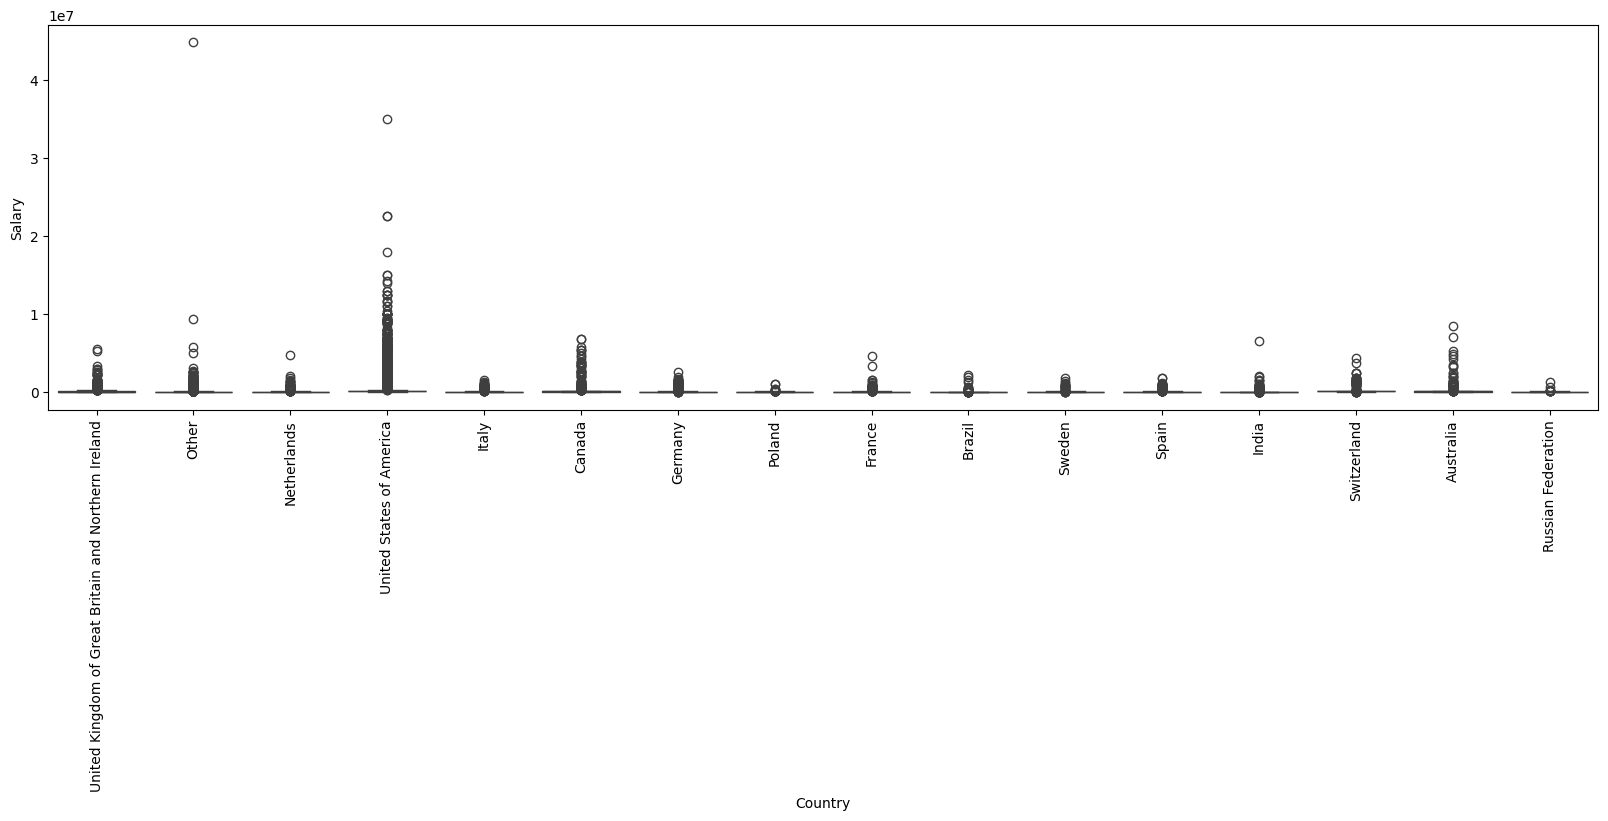

In [157]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x="Country", y="Salary")
plt.xticks(rotation=90)
plt.show()

**EX6** To improve the resolution, filter the dataset based on salary between 10K and 250K and verify the distribution of salaries per country. Which are the most relevant insights based on these new boxplots?


In [158]:
df = df[(df["Salary"] > 10000) & (df["Salary"] < 250000)]

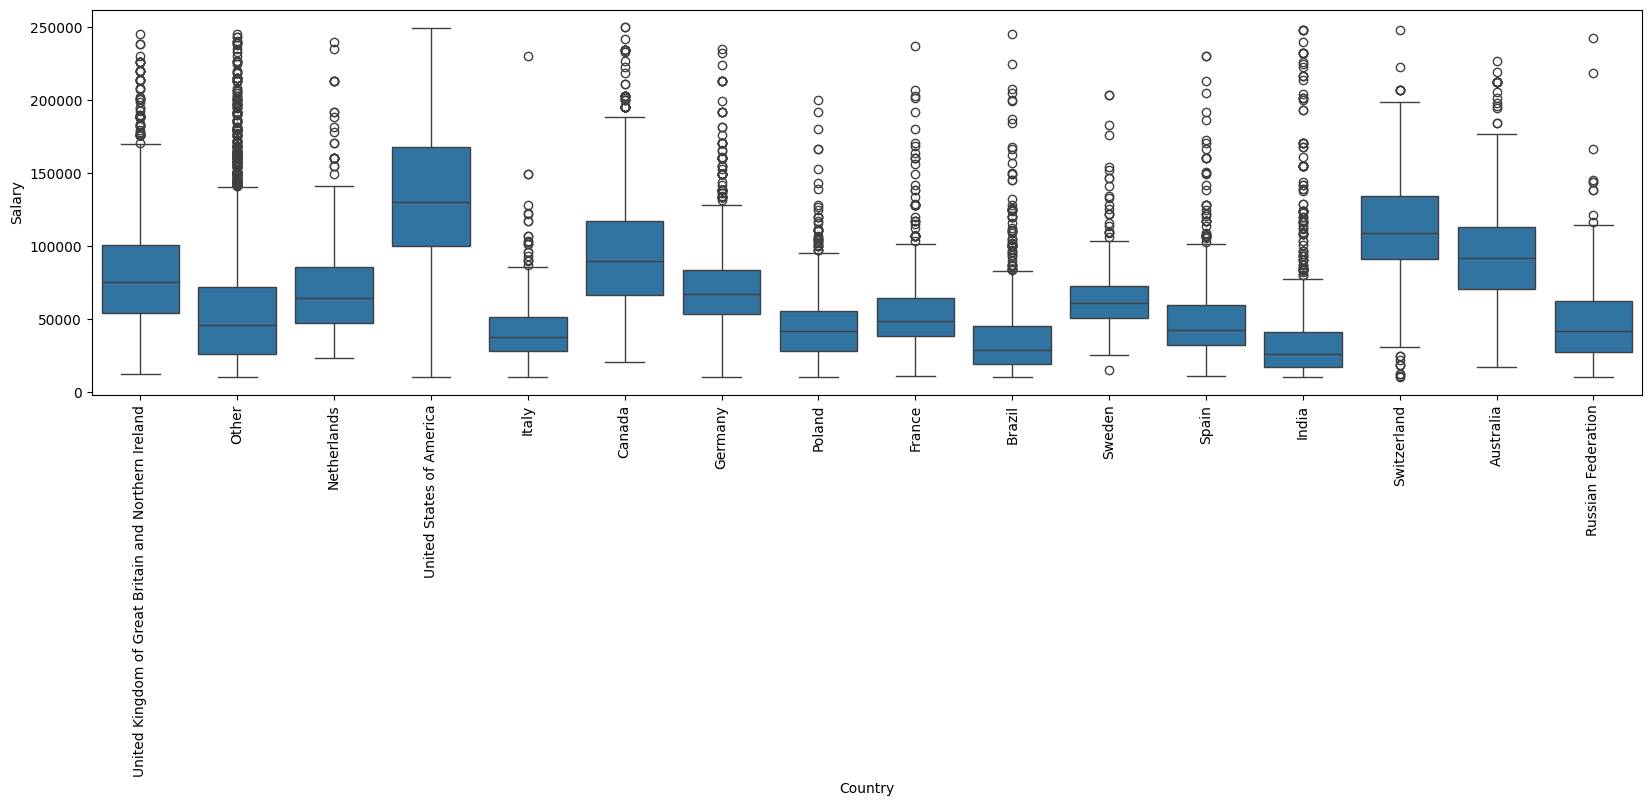

In [159]:
plt.figure(figsize=(20,5))
sns.boxplot(data=df, x="Country", y="Salary")
plt.xticks(rotation=90)
plt.show()

From the presented boxplot, it can be inferred that the USA and Switzerland are the countries with the highest mean salaries, while countries like Brazil and India have the lowest mean salaries. It is interesting to note that most of the salary distributions are right-skewed, with most of the outliers being on the higher end, rather than the lower end. This can be easily visualized with a violin plot.

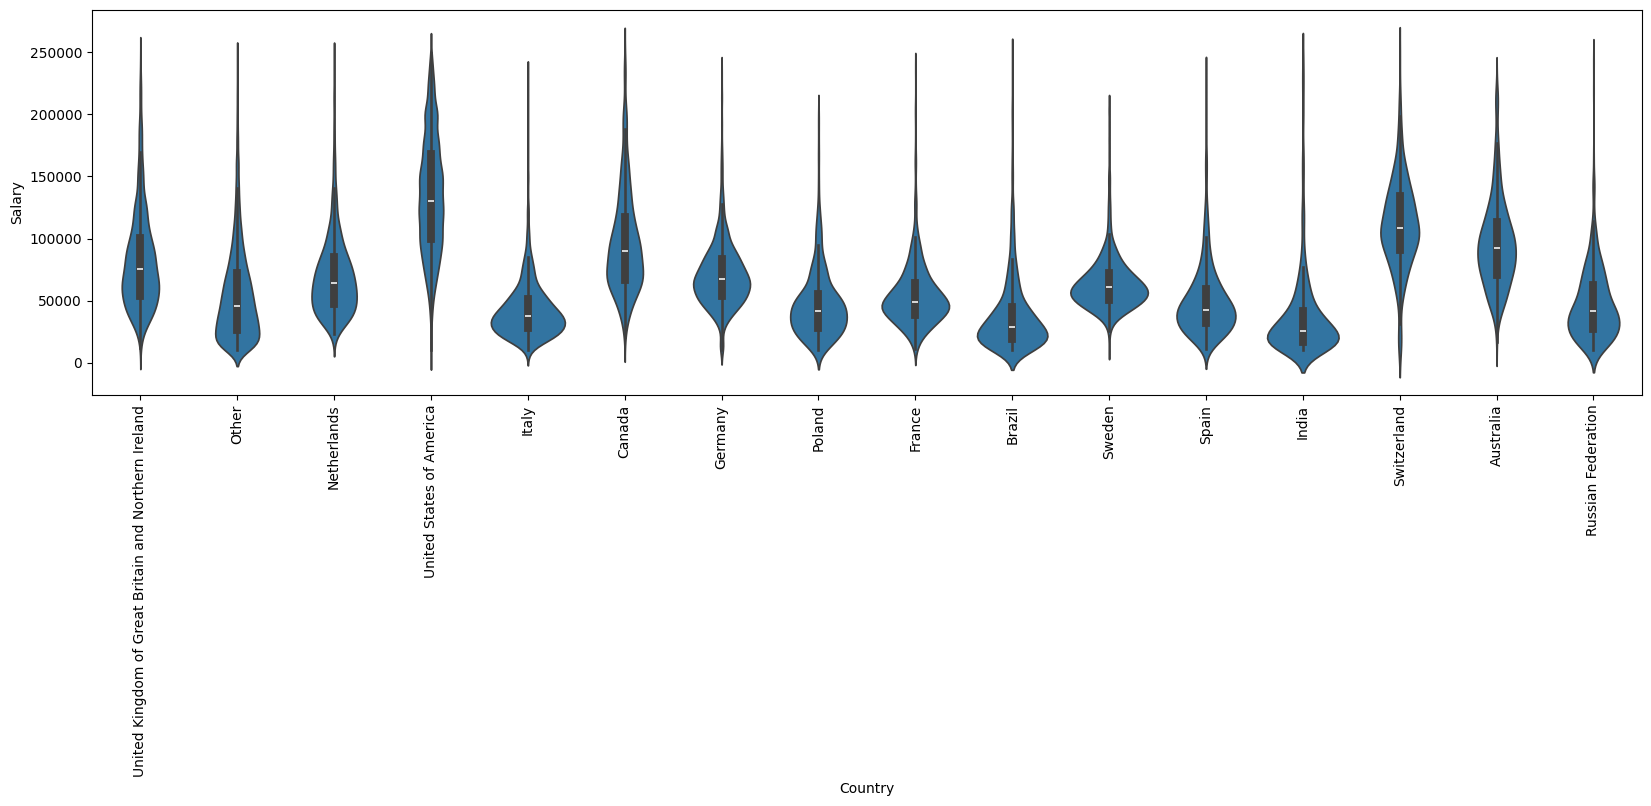

In [160]:
plt.figure(figsize=(20,5))
sns.violinplot(data=df, x="Country", y="Salary")
plt.xticks(rotation=90)
plt.show()

It is interesting to see how countries with strong economies tend to have normally distributed salaries, while poorer countries often have right-skewed distributions, as mentioned earlier.

Let's prepare the `YearsCodePro` to integer. We will build a new **clean_experience()** function to encode over 50 years and below 0.5 years of experience respectively.

In [161]:

print(type(df["YearsCodePro"]))
df["YearsCodePro"].unique()

<class 'pandas.core.series.Series'>


array(['5', '17', '6', '2', '4', '10', '22', '20', '9', '14', '21', '15',
       '3', '25', '7', '8', '12', '19', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '13', '32', '27', '28', '16',
       '31', '30', '34', '35', '26', '42', '38', '36', '40', '41', '29',
       '33', '39', '48', '45', '44', '43', 'More than 50 years', '47',
       '49', '50'], dtype=object)

In [162]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26935 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       26935 non-null  object 
 1   EdLevel       26935 non-null  object 
 2   YearsCodePro  26935 non-null  float64
 3   Employment    26935 non-null  object 
 4   Salary        26935 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.2+ MB


Let's normalize the different values of the `EdLevel`. We will build a new **clean_education** function to normalize the education levels.

In [164]:
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Something else', 'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [165]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [166]:
df["EdLevel"].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

**EX7** Encode using **LabelEncoder** function the `EdLevel` and `Country` columns. Store them into the same `EdLevel` and `Country` columns.

In [167]:
le_edlevel = LabelEncoder()
df["EdLevel"] = le_edlevel.fit_transform(df["EdLevel"])

le_country = LabelEncoder()
df["Country"] = le_country.fit_transform(df["Country"])

In [168]:
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,14,2,5.0,"Employed, full-time",40205.0
3,8,0,17.0,"Employed, full-time",215232.0
8,7,2,6.0,"Employed, full-time",49056.0
10,14,0,2.0,"Employed, full-time",60307.0
12,15,0,5.0,"Employed, full-time",65000.0


# 2. Modelling

We are ready to build a ML model to predict the salary based on the 3 variables: country, education level and years of experience.

**EX8** Split into train and test dataset and verify the length of all datasets.

In [169]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [170]:
print(f"Train size: {df_train.shape[0]}")
print(f"Test size: {df_test.shape[0]}")

Train size: 20201
Test size: 6734


**EX9** Apply a Linear Regression model to fit and evaluate the performance of the prediction based on the mean squared error.

In [171]:
predictors = ["Country", "EdLevel", "YearsCodePro"]
prediction = ["Salary"]

In [172]:
X_train = df_train[predictors]
y_train = df_train[prediction]

lr = LinearRegression().fit(X_train, y_train)

In [173]:
X_test = df_test[predictors]
y_test = df_test[prediction]

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Square root of the Mean Squared Error: {sqrt(mse)}")

Mean Squared Error: 1860131394.2495718
Square root of the Mean Squared Error: 43129.2405943992


**EX10** Repeat the **EX9** using a RandomForest model. Has it improved the mean squared error?

In [174]:
rf = RandomForestRegressor()

rf.fit(X_train, y_train.squeeze())

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Square root of the Mean Squared Error: {sqrt(mse)}")


Mean Squared Error: 1251715758.53837
Square root of the Mean Squared Error: 35379.595228582955


Yes, the use of a RandomForest reduces the mean squared error and therefore improves the overall performance of the prediction. The random forest is able to capture non-linearities in the data, making it more flexible and accurate when the relationships between features and the target variable are complex or non-linear.

In order to find the best hyperparameters for the regression model, we will use **GridsearchCV** apply to the Random Forest.

In [175]:
max_depth = [None, 6,8,10,12]
n_estimatorsint=[50,100,200,300,500]
parameters = {"max_depth": max_depth, "n_estimators": n_estimatorsint}

random_forest_reg = RandomForestRegressor(random_state=42)

gs = GridSearchCV(random_forest_reg, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train, y_train.squeeze())

GridSearchCV(estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 6, 8, 10, 12],
                         'n_estimators': [50, 100, 200, 300, 500]},
             scoring='neg_mean_squared_error')

Once calculate the **best estimator**, we will apply to our use case and calculate the **mean squared error**.

In [176]:
random_forest_reg = gs.best_estimator_

random_forest_reg.fit(X_train, y_train.squeeze())
y_pred_test = random_forest_reg.predict(X_test)
error = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("${:,.02f}".format(error))

$34,674.13


**EX11** Calculate the performance based on **R2 score** of the regression model fitted with the best estimator. Which is your consideration about the performance of the model? Justify your answer. Which visualization plot should we use to evaluate the performance of the regression model?

In [177]:
r2 = r2_score(y_test, y_pred_test) 
print(f"R2 score: {r2}")

R2 score: 0.5413984100739704


An R² score of 0.54 means that 54% of the variance in the data can be explained by the model. While this score is not ideal and could potentially be improved with more sophisticated or non-linear models, it can be considered acceptable in this case, as the data does not require high sensitivity or precision. An scatter plot comparing the predicted and true values is a good option to evaluate the performance of the regression model. A good regression model should have a tight clustering of points along the line y=x, meaning the predicted values are close to the true values. If the points are widely scattered, it suggests poor performance.

**EX12** Make a prediction for a software developer in `Spain`, with `Master's degree` and 15 years of experience.

In [178]:
sample = pd.DataFrame({
    'Country': ['Spain'],
    'EdLevel': ['Master’s degree'],
    'YearsCodePro': [15]
})

sample["EdLevel"] = le_edlevel.transform(sample["EdLevel"])
sample["Country"] = le_country.transform(sample["Country"])


predicted_salary = random_forest_reg.predict(sample)
print(f"The predicted salary is {predicted_salary}")

The predicted salary is [66786.483066]


# 3. Communicating results through a Visual Analytics web tool.

We are ready to share our results with our Consultant team and customers. To do it, we will create a Data product using the Streamlit framework. This web app should have a least 2 tabs: one for data exploration and other for salary prediction.

Before building this app, you should store the ML model and labencoders in a **pickle** format as follows. This pickle file will be the one you need to call in your web app.

In [181]:

import pickle

In [182]:
data = {"model": random_forest_reg, "le_country": le_country, "le_education": le_edlevel}
with open('../models/saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

You can verify the pickle file works as follows: first, open the file storing into 3 variables the regressor, the labencoder for country and the labencoder for education.

In [184]:
with open('../models/saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]

You can also make a prediction with a sample as follows:

In [185]:
y_pred = regressor_loaded.predict(sample)
y_pred

array([66786.483066])

Now, you are ready to go to next step: building the Visual Analytics tool based on Streamlit. Recall, your app should have a main .py file (for instante, **my_app.py**) and a folder called **pages** with all .py files you want to show in your app.